In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unittest
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [2]:
boston_data = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

In [3]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
Y=load_boston().target
X=load_boston().data

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [6]:
# Structure of entire data
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
# Structure of just the training data
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
# Structure of test data
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


In [7]:
# Data normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
## Adding the PRIZE Column in the data
train_data = pd.DataFrame(x_train)
train_data['price'] = y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.405893,0.544846,-0.794185,-0.293069,-1.073570,0.337046,-1.956643,1.744671,-0.302917,-0.471373,0.300539,0.434782,-0.960716,24.4
1,-0.388707,-0.460905,-0.100421,-0.293069,-0.583213,-1.214889,-2.069526,-0.088335,-0.646245,-0.783691,0.067226,-0.084526,2.297675,23.7
2,-0.351631,0.453415,-1.071398,-0.293069,0.752588,3.537640,0.650254,-0.948009,-0.531803,-0.860298,-2.545881,0.362616,-1.068181,50.0


In [9]:
# Getting the np array needed for stochastic gradient descent while performing linear regression
x_test=np.array(x_test)
y_test=np.array(y_test)

In [10]:
# Writing the custom Stochastic Gradient Descient Function here

def stochasticGradientFunc(train_data, learning_rate, epochs, batch_size, lambda_value):

  # Setting initial w and b coefficients as we know that the linear regression formula to be y = mx + c or y = wx + b
  b = 0
  # Setting initial w coeffcient as per the train_data: setting it to 13 zeros as y column called pPrice' was also added to train_data which must not be part of this updation
  w = np.zeros((1, 13))

  # We create batches of our entire data and for each batch of data we compute the gradients and this is done for all the batches for all epochs. 
  # Note: More number of epochs will produce better gradient descent results. Trial and error with different number of epochs
  current_epoch = 1
  while(current_epoch < epochs):

    # Initial Gradients for every epoch
    b_gradient=0
    w_gradient = np.zeros((1, 13))
        
    # Getting the batches of data from train_data
    batch_train_data = train_data.sample(batch_size)

    # Creating the train and actual data from this batch
    x = np.array(batch_train_data.drop('price', axis=1))
    y = np.array(batch_train_data['price'])

    for i in range(0, batch_size):
      pred = np.dot(w, x[i]) + b
      w_gradient += (-2) * x[i] * (y[i] - (pred))
      b_gradient += (-2) * (y[i] - (pred))

    # Updation of the coefficients using the gradients and Ridge regularization/ L2 Regularization to prevent overfitting
    w_gradient = w_gradient/batch_size
    w_gradient += (lambda_value * w * 2) 
    w -= learning_rate * (w_gradient)
    b -= learning_rate * (b_gradient/batch_size)
    current_epoch += 1

  # Return the Coefficients 
  return w, b

## Attempts at Tuning learning_rate, epochs, and batch_size
Attempt 1: learning_rate = 1

epochs = 100

batch_size = 10

####MSE: 2.46861231272804e+206

Attempt 2: learning_rate = 0.1

epochs = 100

batch_size = 10

####MSE: 60.283173318340005

In [11]:
# Calling the stochasticGradientFunc
learning_rate = 0.01
epochs = 1000
batch_size = 20
lambda_value = 0.1
w, b = stochasticGradientFunc(train_data, learning_rate, epochs, batch_size, lambda_value)

## With L2 Regularization and with the final hyperparameters chosen
learning_rate = 0.01

epochs = 1000

batch_size = 20

lambda_value i.e penalty = 0.1

####MSE:  27.15047027729554
Note: Goal is to obtain a reduced testing error due to Regularization by intentionally increasing training error through penalty for the model if regularization is done right. 
Above given MSE is a reduced testing error from previous attempts without regulatization.

The MSE would vary depending on the sample selected every epoch as that would be different everytie the model is trained

In [12]:
y_prediction = list()
for i in range(0, len(x_test)):
  y = np.ndarray.item(np.dot(w, x_test[i]) + b)
  y_prediction.append(y)
y_pred =  np.array(y_prediction)

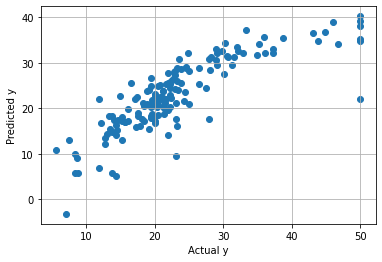

MSE:  27.15047027729554
Weights post training: 
[[-0.92748692  0.75560923 -0.66586499  0.56301327 -1.54675453  2.48707605
   0.03921274 -2.00444249  1.02430128 -0.91300209 -2.02177125  0.61930445
  -3.20296527]]


In [13]:
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()
#print(y_pred)
#print(y_test)
## Mean Squared Error
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Weights post training: ")
print(w)

In [24]:
class TestNotebook(unittest.TestCase):

    def test(self):
      learning_rate = 0.01
      epochs = 1000
      batch_size = 20
      lambda_value = 0.1
      # asserting final coefficients exists
      result_w = stochasticGradientFunc(train_data, learning_rate, epochs, batch_size, lambda_value)

      self.assertIsNotNone(result_w, "Passed")

    def test_1(self):
      learning_rate = 0.01
      epochs = 1000
      batch_size = 20
      lambda_value = 0.1
      # asserting len of coeffcients is equal to number of features used in training except the target variable
      result_1, result_2 = stochasticGradientFunc(train_data, learning_rate, epochs, batch_size, lambda_value)

      num_of_features = train_data.shape[1] - 1
      self.assertEqual(len(result_1[0]), num_of_features)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test (__main__.TestNotebook) ... ok
test_1 (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 2 tests in 8.024s

OK
